In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import warnings; warnings.simplefilter('ignore')

# Шлях до файлу
countries_file = 'C:/IDA_Ostrovshchuk/Country-data-copy.csv'

# Назви стовпців для файлу
countries_columns = ['Name', 'Children mortality', 'Exports', 'Health', 'Imports', 'Income', 'Inflation', 'Life expectancy', 'Total Fertility', 'GDP']

# Завантаження файлів у змінні DataFrame
countries = pd.read_csv(countries_file, sep=',', header=None, names=countries_columns, engine='python')

In [21]:
# Вивести перші 5 рядків датафрейму
print(countries.head())

# Загальна інформація про дані
print(countries.info())

# Видалення рядків з пропущеними значеннями
countries = countries.dropna()



                  Name  Children mortality  Exports  Health  Imports  Income  \
0          Afghanistan                90.2     10.0    7.58     44.9    1610   
1              Albania                16.6     28.0    6.55     48.6    9930   
2              Algeria                27.3     38.4    4.17     31.4   12900   
3               Angola               119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda                10.3     45.5    6.03     58.9   19100   

   Inflation  Life expectancy  Total Fertility    GDP  
0       9.44             56.2             5.82    553  
1       4.49             76.3             1.65   4090  
2      16.10             76.5             2.89   4460  
3      22.40             60.1             6.16   3530  
4       1.44             76.8             2.13  12200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              ----

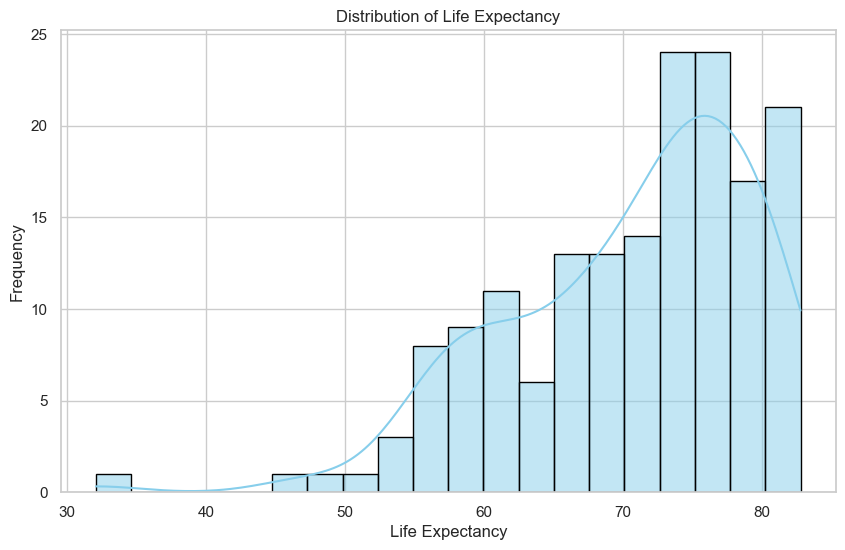

In [22]:
# Однофакторний аналіз: гістограма "Life expectancy"
# Налаштування стилю Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(countries['Life expectancy'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


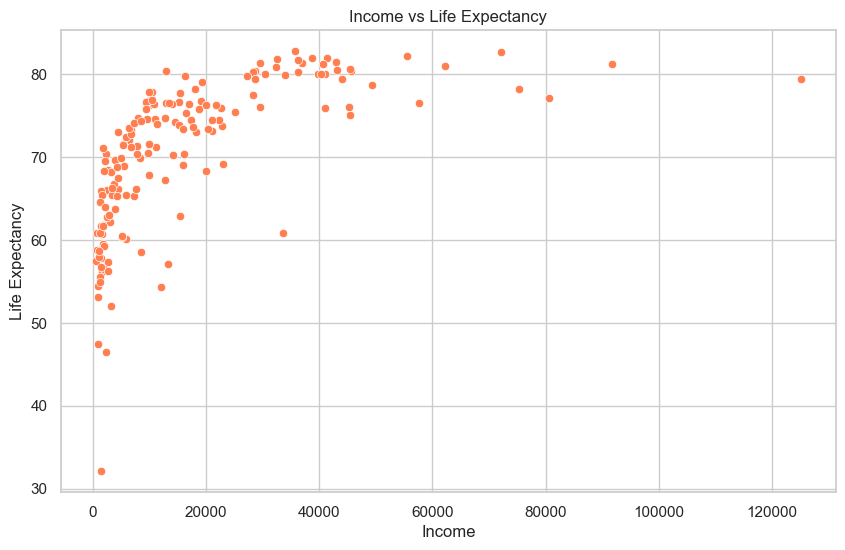

In [23]:
# Двофакторний аналіз: scatter plot "Income" vs "Life expectancy"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Life expectancy', data=countries, color='coral')
plt.title('Income vs Life Expectancy')
plt.xlabel('Income')
plt.ylabel('Life Expectancy')
plt.show()

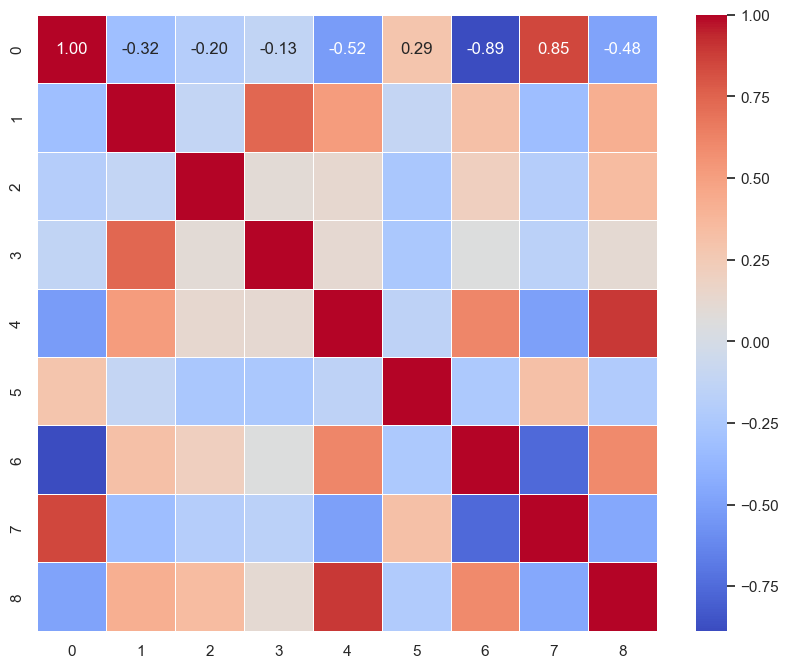

In [24]:
#Кореляційний аналіз
# Встановлення розмірів графіку
plt.figure(figsize=(10, 8))

# Створення теплокарти кореляційної матриці за допомогою seaborn
correlation_matrix = np.corrcoef(countries.drop('Name', axis = 1).transpose())
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Відображення графіку
plt.show()

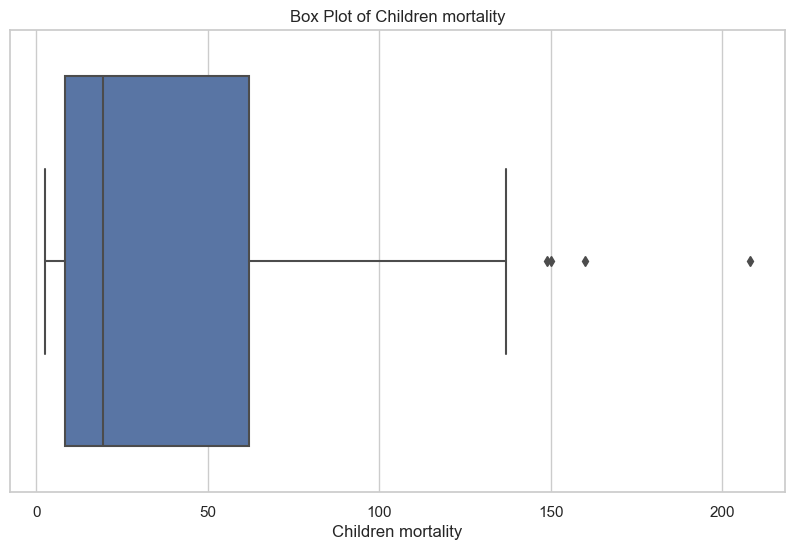

Outliers in Children mortality:
                          Name  Children mortality
31   Central African Republic               149.0
32                       Chad               150.0
66                      Haiti               208.0
132              Sierra Leone               160.0


In [25]:
# Визначення міжквартильного розмаху для "Child mortality"
Q1_child = countries['Children mortality'].quantile(0.25)
Q3_child = countries['Children mortality'].quantile(0.75)
IQR_child = Q3_child - Q1_child

# Визначення викидів для "Child mortality"
outliers_child_mortality = (countries['Children mortality'] < (Q1_child - 1.5 * IQR_child)) | (countries['Children mortality'] > (Q3_child + 1.5 * IQR_child))

# Box plot для "Child mortality"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Children mortality'])
plt.title('Box Plot of Children mortality')
plt.show()
print("Outliers in Children mortality:\n", countries.loc[outliers_child_mortality, ['Name', 'Children mortality']])

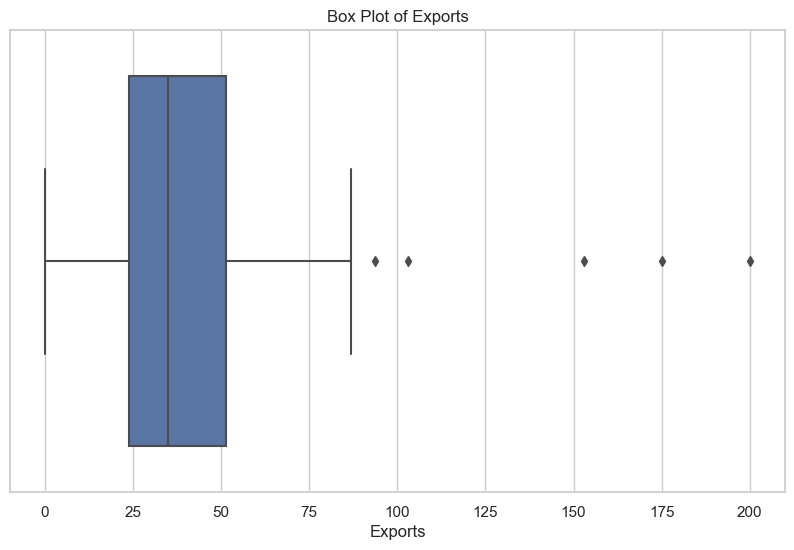

Outliers in Exports:
            Name  Exports
73      Ireland    103.0
91   Luxembourg    175.0
98        Malta    153.0
131  Seychelles     93.8
133   Singapore    200.0


In [26]:
# Визначення міжквартильного розмаху для "Exports"
Q1_exports = countries['Exports'].quantile(0.25)
Q3_exports = countries['Exports'].quantile(0.75)
IQR_exports = Q3_exports - Q1_exports

# Визначення викидів для "Exports"
outliers_exports = (countries['Exports'] < (Q1_exports - 1.5 * IQR_exports)) | (countries['Exports'] > (Q3_exports + 1.5 * IQR_exports))

# Box plot для "Exports"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Exports'])
plt.title('Box Plot of Exports')
plt.show()
print("Outliers in Exports:\n", countries.loc[outliers_exports, ['Name', 'Exports']])

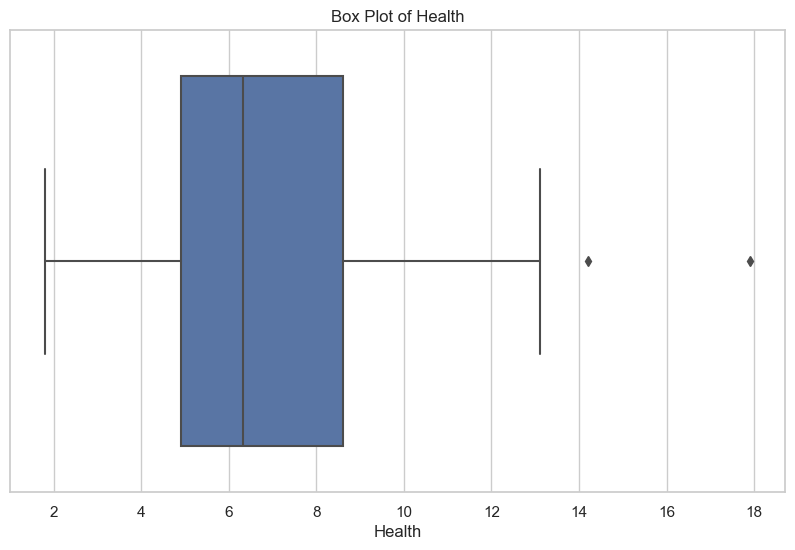

Outliers in Health:
                       Name  Health
101  Micronesia, Fed. Sts.    14.2
159          United States    17.9


In [27]:
# Визначення міжквартильного розмаху для "Health"
Q1_health = countries['Health'].quantile(0.25)
Q3_health = countries['Health'].quantile(0.75)
IQR_health = Q3_health - Q1_health

# Визначення викидів для "Health"
outliers_health = (countries['Health'] < (Q1_health - 1.5 * IQR_health)) | (countries['Health'] > (Q3_health + 1.5 * IQR_health))

# Box plot для "Health"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Health'])
plt.title('Box Plot of Health')
plt.show()
print("Outliers in Health:\n", countries.loc[outliers_health, ['Name', 'Health']])

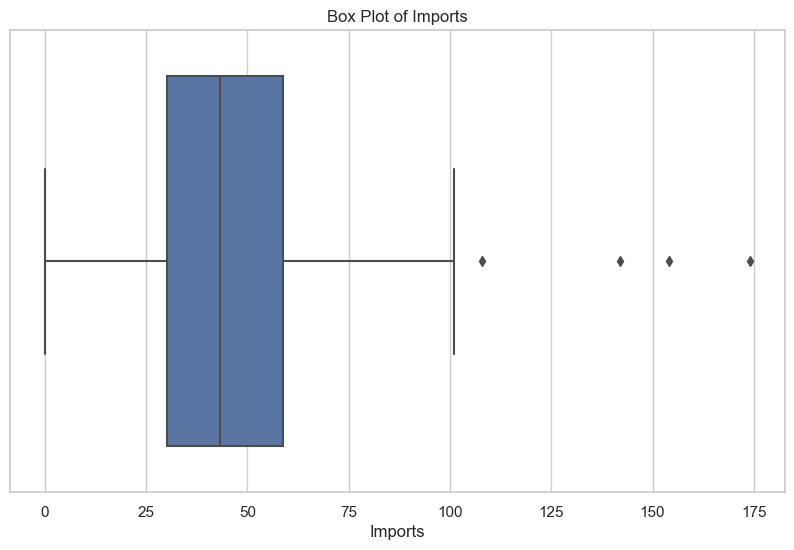

Outliers in Imports:
            Name  Imports
91   Luxembourg    142.0
98        Malta    154.0
131  Seychelles    108.0
133   Singapore    174.0


In [28]:
# Визначення міжквартильного розмаху для "Imports"
Q1_imports = countries['Imports'].quantile(0.25)
Q3_imports = countries['Imports'].quantile(0.75)
IQR_imports = Q3_imports - Q1_imports

# Визначення викидів для "Imports"
outliers_imports = (countries['Imports'] < (Q1_imports - 1.5 * IQR_imports)) | (countries['Imports'] > (Q3_imports + 1.5 * IQR_imports))

# Box plot для "Imports"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Imports'])
plt.title('Box Plot of Imports')
plt.show()
print("Outliers in Imports:\n", countries.loc[outliers_imports, ['Name', 'Imports']])

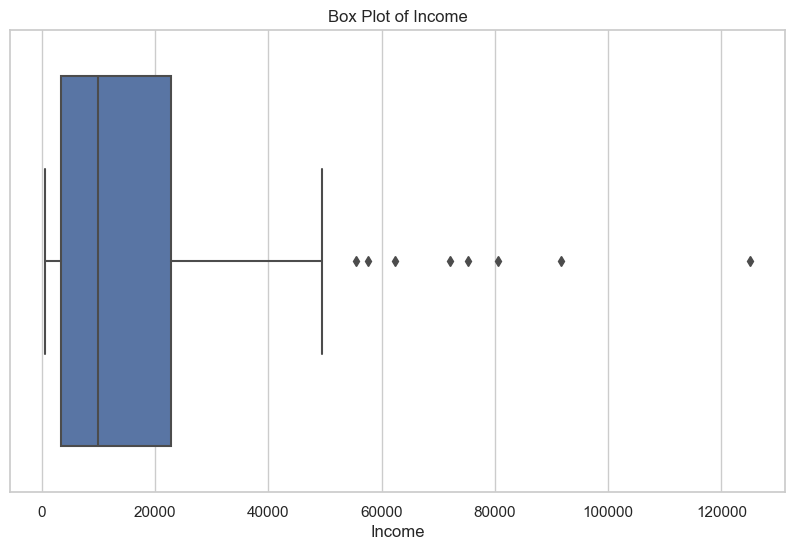

Outliers in Income:
                      Name  Income
23                 Brunei   80600
82                 Kuwait   75200
91             Luxembourg   91700
114                Norway   62300
123                 Qatar  125000
133             Singapore   72100
145           Switzerland   55500
157  United Arab Emirates   57600


In [29]:
# Визначення міжквартильного розмаху для "Income"
Q1_income = countries['Income'].quantile(0.25)
Q3_income = countries['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Визначення викидів для "Income"
outliers_income = (countries['Income'] < (Q1_income - 1.5 * IQR_income)) | (countries['Income'] > (Q3_income + 1.5 * IQR_income))

# Box plot для "Income"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Income'])
plt.title('Box Plot of Income')
plt.show()
print("Outliers in Income:\n", countries.loc[outliers_income, ['Name', 'Income']])

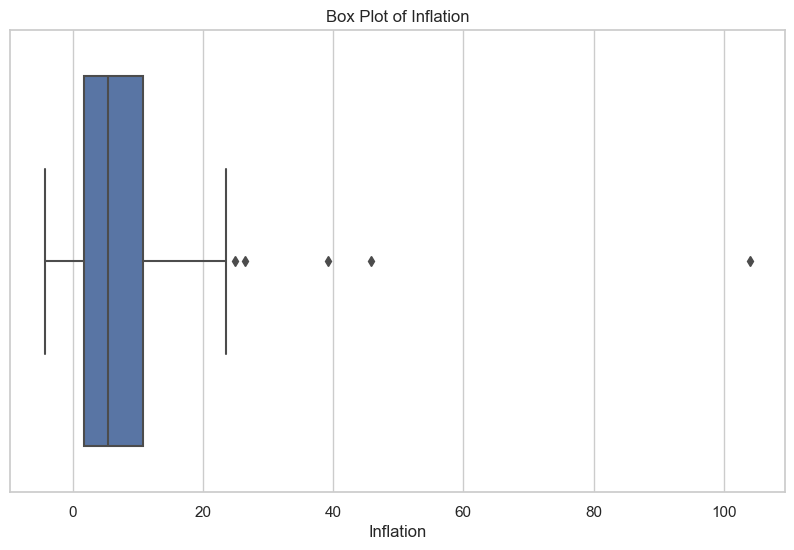

Outliers in Inflation:
                   Name  Inflation
49   Equatorial Guinea       24.9
103           Mongolia       39.2
113            Nigeria      104.0
149        Timor-Leste       26.5
163          Venezuela       45.9


In [30]:
# Визначення міжквартильного розмаху для "Inflation"
Q1_inflation = countries['Inflation'].quantile(0.25)
Q3_inflation = countries['Inflation'].quantile(0.75)
IQR_inflation = Q3_inflation - Q1_inflation

# Визначення викидів для "Inflation"
outliers_inflation = (countries['Inflation'] < (Q1_inflation - 1.5 * IQR_inflation)) | (countries['Inflation'] > (Q3_inflation + 1.5 * IQR_inflation))

# Box plot для "Inflation"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Inflation'])
plt.title('Box Plot of Inflation')
plt.show()
print("Outliers in Inflation:\n", countries.loc[outliers_inflation, ['Name', 'Inflation']])

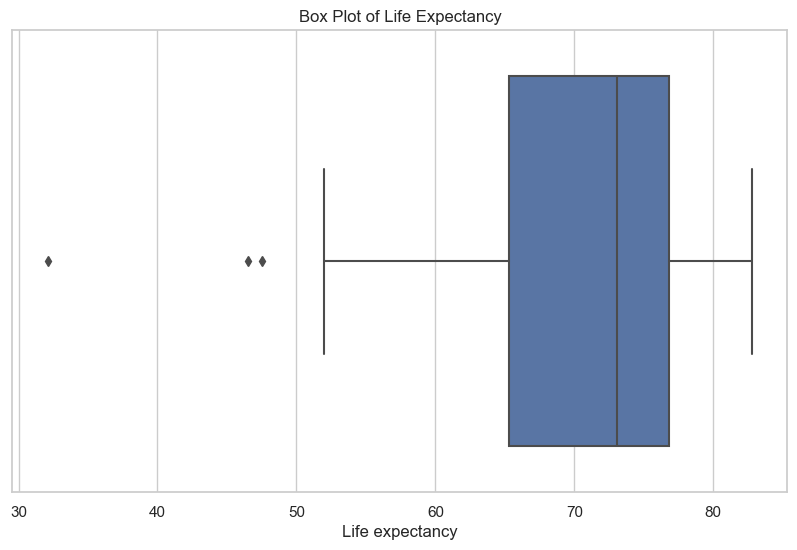

Outliers in Life Expectancy:                         Name  Life expectancy
31  Central African Republic             47.5
66                     Haiti             32.1
87                   Lesotho             46.5


In [31]:
# Визначення міжквартильного розмаху для "Life expectancy"
Q1_life = countries['Life expectancy'].quantile(0.25)
Q3_life = countries['Life expectancy'].quantile(0.75)
IQR_life = Q3_life - Q1_life

# Визначення викидів для "Life expectancy"
outliers_life = (countries['Life expectancy'] < (Q1_life - 1.5 * IQR_life)) | (countries['Life expectancy'] > (Q3_life + 1.5 * IQR_life))

# Box plot для "Life expectancy"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Life expectancy'])
plt.title('Box Plot of Life Expectancy')
plt.show()

# Виведення викидів для "Income" та "Life expectancy"
print("Outliers in Life Expectancy:", countries.loc[outliers_life, ['Name', 'Life expectancy']])

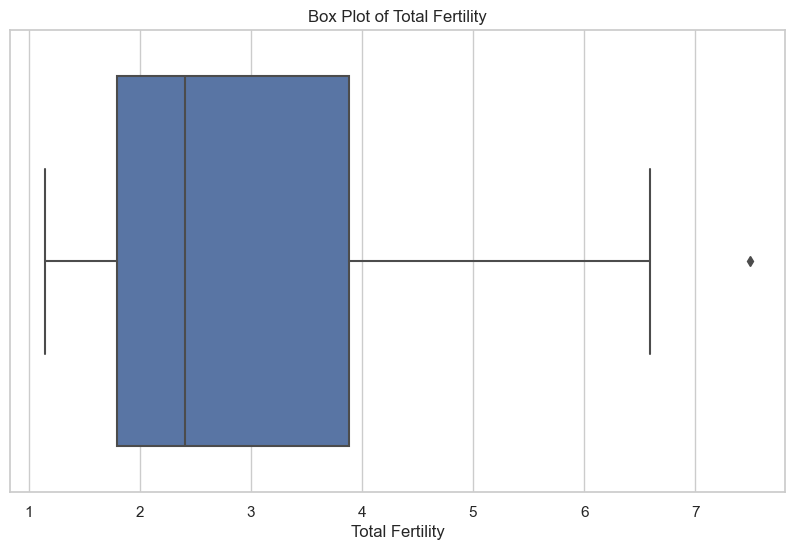

Outliers in Total Fertility:
       Name  Total Fertility
112  Niger             7.49


In [32]:
# Визначення міжквартильного розмаху для "Total Fertility"
Q1_total_fertility = countries['Total Fertility'].quantile(0.25)
Q3_total_fertility = countries['Total Fertility'].quantile(0.75)
IQR_total_fertility = Q3_total_fertility - Q1_total_fertility

# Визначення викидів для "Total Fertility"
outliers_total_fertility = (countries['Total Fertility'] < (Q1_total_fertility - 1.5 * IQR_total_fertility)) | (countries['Total Fertility'] > (Q3_total_fertility + 1.5 * IQR_total_fertility))

# Box plot для "Total Fertility"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Total Fertility'])
plt.title('Box Plot of Total Fertility')
plt.show()
print("Outliers in Total Fertility:\n", countries.loc[outliers_total_fertility, ['Name', 'Total Fertility']])

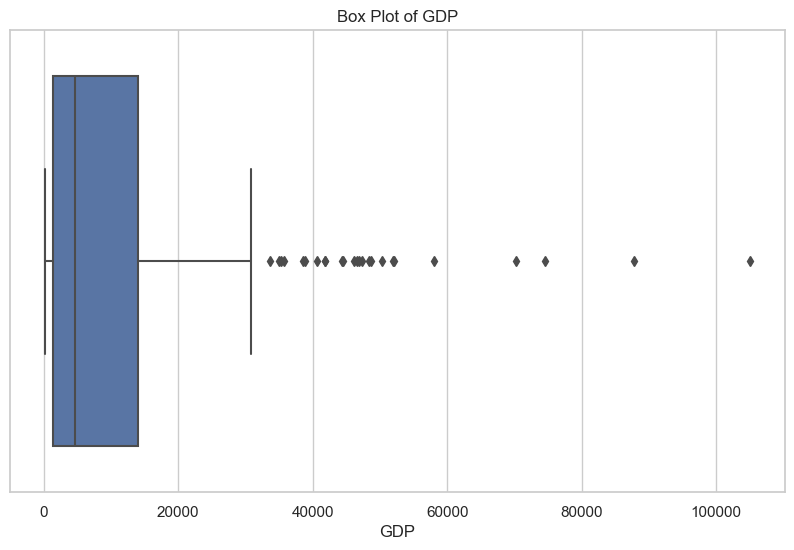

Outliers in GDP:
                      Name     GDP
7               Australia   51900
8                 Austria   46900
15                Belgium   44400
23                 Brunei   35300
29                 Canada   47400
44                Denmark   58000
53                Finland   46200
54                 France   40600
58                Germany   41800
68                Iceland   41900
73                Ireland   48700
75                  Italy   35800
77                  Japan   44500
82                 Kuwait   38500
91             Luxembourg  105000
110           Netherlands   50300
111           New Zealand   33700
114                Norway   87800
123                 Qatar   70300
133             Singapore   46600
144                Sweden   52100
145           Switzerland   74600
157  United Arab Emirates   35000
158        United Kingdom   38900
159         United States   48400


In [33]:
# Визначення міжквартильного розмаху для "GDP"
Q1_gdp = countries['GDP'].quantile(0.25)
Q3_gdp = countries['GDP'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Визначення викидів для "GDP"
outliers_gdp = (countries['GDP'] < (Q1_gdp - 1.5 * IQR_gdp)) | (countries['GDP'] > (Q3_gdp + 1.5 * IQR_gdp))

# Box plot для "GDP"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['GDP'])
plt.title('Box Plot of GDP')
plt.show()
print("Outliers in GDP:\n", countries.loc[outliers_gdp, ['Name', 'GDP']])

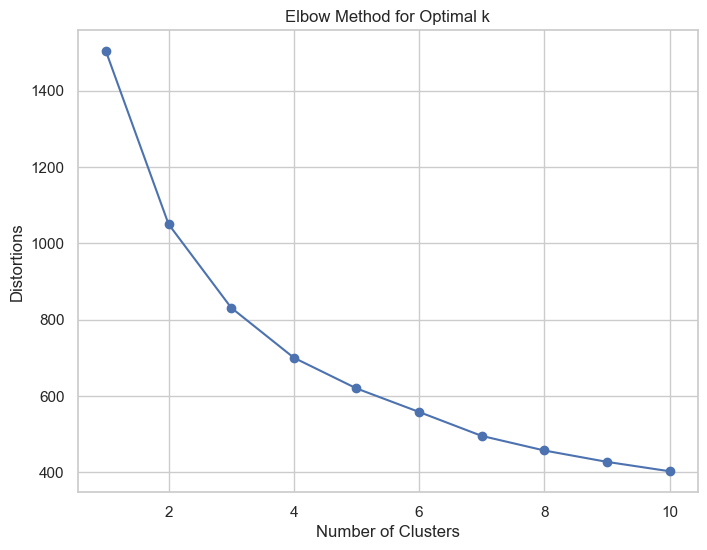

In [34]:
# Відокремлюємо числові стовпці для кластеризації
data = countries.drop('Name', axis=1)

# Стандартизація даних
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Знаходження оптимального k за допомогою методу ліктя
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortions')
plt.show()

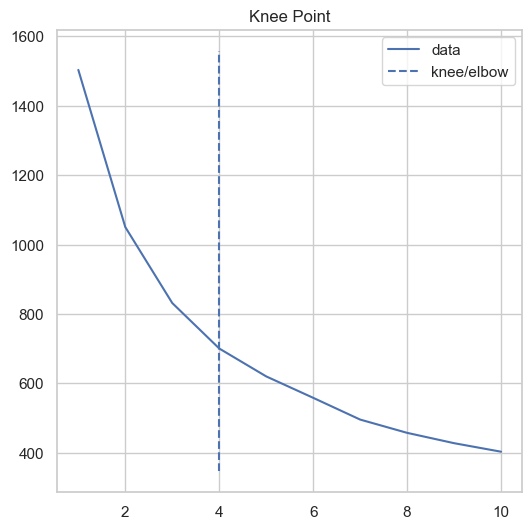

In [35]:
# Визначення оптимального k за допомогою kneed
kl = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
optimal_k = kl.elbow
kl.plot_knee()
plt.show()

# Кластеризація з оптимальним k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
countries['Cluster'] = kmeans_optimal.fit_predict(data_scaled)

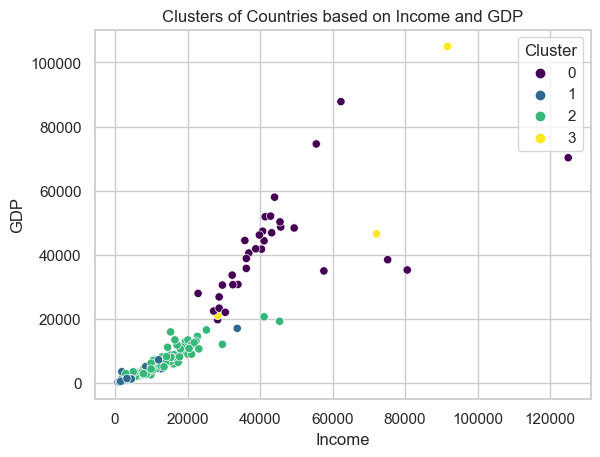

In [36]:
# Візуалізація результатів кластеризації для Income та GDP
sns.scatterplot(x='Income', y='GDP', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on Income and GDP')
plt.xlabel('Income')
plt.ylabel('GDP')
plt.show()

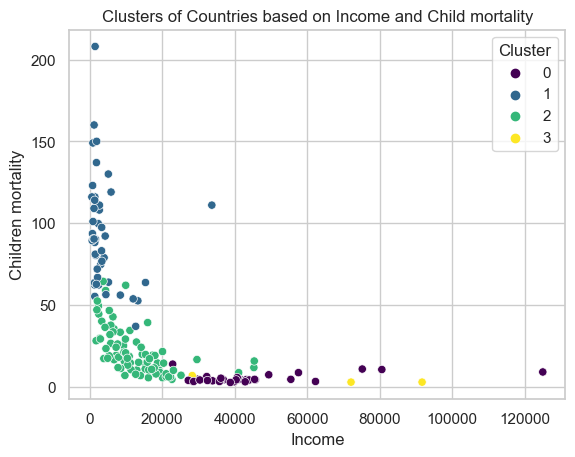

In [37]:
# Візуалізація результатів кластеризації для Income та Children mortality
sns.scatterplot(x='Income', y='Children mortality', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on Income and Child mortality')
plt.xlabel('Income')
plt.ylabel('Children mortality')
plt.show()

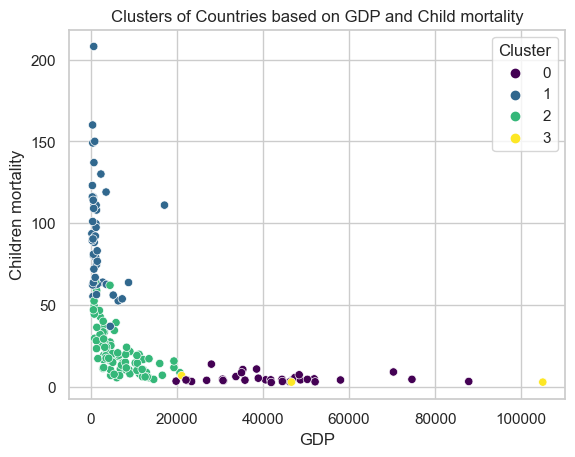

In [38]:
# Візуалізація результатів кластеризації для GDP та Children mortality
sns.scatterplot(x='GDP', y='Children mortality', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on GDP and Child mortality')
plt.xlabel('GDP')
plt.ylabel('Children mortality')
plt.show()

In [39]:
# Виведення таблиці з результатами кластеризації
cluster_table = countries[['Name', 'Cluster']]
cluster_table.sort_values(by='Cluster', inplace=True)
print(cluster_table)

            Name  Cluster
111  New Zealand        0
122     Portugal        0
114       Norway        0
29        Canada        0
110  Netherlands        0
..           ...      ...
95      Malaysia        2
103     Mongolia        2
133    Singapore        3
98         Malta        3
91    Luxembourg        3

[167 rows x 2 columns]


In [40]:
# Відфільтруємо таблицю для кластера 0
cluster_1_table = cluster_table[cluster_table['Cluster'] == 1]

# Виведемо результат
print(cluster_1_table)

                         Name  Cluster
147                  Tanzania        1
81                   Kiribati        1
80                      Kenya        1
129                   Senegal        1
150                      Togo        1
72                       Iraq        1
66                      Haiti        1
64              Guinea-Bissau        1
149               Timor-Leste        1
155                    Uganda        1
84                        Lao        1
132              Sierra Leone        1
126                    Rwanda        1
137              South Africa        1
116                  Pakistan        1
113                   Nigeria        1
112                     Niger        1
63                     Guinea        1
142                     Sudan        1
108                   Namibia        1
106                Mozambique        1
99                 Mauritania        1
97                       Mali        1
94                     Malawi        1
93                 Madaga